[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ManuelEspejo/Machine-Learning-Bases/blob/main/notebooks/01_Aprendizaje-Supervisado.ipynb) 👈🏻​ **Pulsar para abrir en Colab​**

# ¿Cómo usar estos notebooks?

Si este es el primer notebook que abres en este repositorio, te recomiendo que antes leas el [Manual de uso de estos notebooks](https://github.com/ManuelEspejo/Machine-Learning-Bases/blob/main/docs/manual-notebooks.md) que he creado para que te familiarices con el proyecto y las distintas rutas que puedes seguir, luego puedes volver aquí y continuar.

En este notebook, vamos a profundizar en par de ejemplos prácticos de aprendizaje supervisado.

Por otra parte, si aún no has revisado el notebook "[00_Empieza-aquí.ipynb](https://github.com/ManuelEspejo/Machine-Learning-Bases/blob/main/notebooks/00_Empieza-aquí.ipynb)", te sugiero que le eches un vistazo primero para conocer los conceptos básicos. Pero si ya tienes una idea clara de qué es el aprendizaje supervisado y quieres verlo en acción, ¡estás en el lugar correcto!

# 01. Aprendizaje Supervisado

El Aprendizaje Supervisado es un tipo de aprendizaje automático en el que el modelo entrena usando un conjunto de datos etiquetado. En este notebook, vamos a ver dos de sus aplicaciones más comunes: la clasificación y la regresión.

## ¿Qué vamos a cubrir?

1. **Clasificación Binaria**: Crearemos un modelo que clasifique clientes de una tienda de bicicletas en dos grupos: Los que probablemente compren una bicicleta, y los que no.
2. **Regresión**: Crearemos un modelo que prediga el porcentaje de satisfacción de un cliente en base a diversos factores demográficos y de comportamiento.

Con estos ejemplos podrás ver cómo el aprendizaje supervisado se adapta a diferentes tipos de problemas y cómo puedes utilizar estas técnicas para obtener resultados prácticos.

# Índice
```{table} Índice de Contenidos

1. Clasificación Binaria: Clasificador de compradores de bicicletas
   1.1 Descripción del Problema
   1.2 Descargar el Dataset
   1.3 Exploración y Preprocesamiento de Datos
   1.4 Selección de características
   1.5 Transformación de datos
   1.6 Manejando los datos faltantes
   1.7 Otras exploraciones
   1.8 Separar los datos en subconjuntos (Training y Testing)
   1.9 Entrenar el modelo
      1.9.1 Hacer predicciones y evaluar la precisión
      1.9.2 Análisis y reportes de resultados
      1.9.3 Importancia de las características
      1.9.4 Matriz de confusión
   1.10 Ejemplo usando todos los datos
      1.10.1 Análisis de los Coeficientes del Modelo
      1.10.2 Matriz de confusión
2. Regresión: Predicción de satisfacción del cliente
   2.1 Descargar el Dataset
   2.2 Explorar los datos
      2.2.1 Información general del dataset
      2.2.2 Análisis visual
   2.3 División de datos en conjuntos de entrenamiento y prueba
   2.4 Preprocesamiento de datos
      2.4.1 Manejo de datos faltantes
      2.4.2 Transformación de datos
      2.4.3 Visualizando datos preprocesados
   2.5 Entrenar y evaluar el modelo
      2.5.1 Entrenar el modelo
      2.5.2 Evaluar el modelo
   2.6 Visualización de resultados
   2.7 Importancia de las características
      2.7.1 Interpretación de los coeficientes
```

# 1. Clasificación Binaria: Clasificador de compradores de bicicletas

Para este ejemplo, nos vamos a poner en la piel de un encargado de una tienda de bicicletas que busca aplicar un modelo de Machine Learning para predecir si una persona va a comprar una bicicleta o no.

Para esta tarea, vamos a usar un dataset de Kaggle (una conocida plataforma de ciencia de datos). Este dataset se compone de 1000 filas de datos. Cada fila representa a una persona, y cada columna representa una característica de esa persona. Además, una de las columnas (`Purchased Bike`) es la que queremos predecir. Esta columna corresponde a las **etiquetas** o **labels**, y tiene dos valores posibles:

- `Yes`: La persona compró una bicicleta.
- `No`: La persona no compró una bicicleta.

Al tener dos clases posibles, este es un problema de clasificación binaria.

El resto de elementos son las **features** o **características**, y son las variables que usaremos para predecir la etiqueta.

Estos son los datos que tenemos:

- **ID**: Identificador de la persona.

**Features:**
- **Marital Status**: Estado civil.
- **Gender**: Género.
- **Income**: Ingresos.
- **Children**: Número de hijos.
- **Education**: Nivel de educación.
- **Occupation**: Ocupación.
- **Home Owner**: ¿Es propietario de una vivienda?
- **Cars**: Número de coches.
- **Commute Distance**: Distancia de la vivienda al lugar de trabajo.
- **Region**: Región.
- **Age**: Edad.

**Label:**
- **Purchased Bike**: ¿Ha comprado una bicicleta? (Esto es lo que queremos predecir)


## 1.1. Descargar el Dataset

Este Dataset se puede descargar directamente desde kaggle: [Enlace al Dataset](https://www.kaggle.com/datasets/heeraldedhia/bike-buyers). Para descargarlo, necesitas estar registrado en kaggle, pero para simplificar las cosas, he subido el Dataset a una carpeta compartida de Google Drive, y puedes simplemente ejecutar el código siguiente para descargarlo y usarlo.

> **Nota:** Si estás usando Google Colab, los archivos se descargan en tu equipo de manera temporal mientras dure la sesión en el entorno de ejecución, luego se borrarán y todo quedará limpio, si quieres guardarlos en tu sistema, tienes que descargarlos manualmente.

In [1]:
# Importar librerías

import os
import random
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay,
    mean_squared_error,
    r2_score
)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

In [2]:
# Detectar si estamos en Colab
in_colab = 'google.colab' in str(get_ipython())

if in_colab:
    # Descargar el archivo helper_functions.py desde el repositorio de GitHub
    !mkdir -p /content/utils # Creamos una carpeta utils para que coincida con la estructura del repositorio
    !wget -O utils/helper_functions.py "https://raw.githubusercontent.com/ManuelEspejo/Machine-Learning-Bases/main/utils/helper_functions.py"
    data_dir = '/content/data' # Ruta de los datos
else:
    # Agregar el directorio raíz al path de Python (Para ejecutar en local)
    notebook_dir = os.path.dirname(os.path.abspath('__file__'))
    project_dir = os.path.dirname(notebook_dir)
    sys.path.append(project_dir)
    data_dir = '../data/raw'


In [3]:
from utils.helper_functions import *  # noqa: F403

# Descargamos los datos desde el enlace compartido de google Drive
download_data('https://drive.google.com/uc?id=1FqMwy0E4O7evqMYIm23y2UjI8QwgbQ9h')

Descargando desde Google Drive...
Tamaño del archivo ZIP: 22771 bytes
Contenido del ZIP: ['bike_buyers.csv', 'bike_buyers_clean.csv']

Archivos disponibles:
- bike_buyers.csv (87182 bytes)
- bike_buyers_clean.csv (86348 bytes)
- CC GENERAL.csv (902879 bytes)
- customer_feedback_satisfaction.csv (1963795 bytes)


In [4]:
# Mostrar los archivos en la carpeta 'data'
print(f"Archivos disponibles en {data_dir}:", os.listdir(data_dir))

Archivos disponibles en ../data/raw: ['bike_buyers.csv', 'bike_buyers_clean.csv', 'CC GENERAL.csv', 'customer_feedback_satisfaction.csv']


El archivo que nos interesa es `bike_buyers.csv`. Los archivos `.csv` (Comma Separated Values) son archivos de texto que, como su nombre indica, contienen datos separados por comas, y son muy comunes en la ciencia de datos.

In [5]:
# Cargar el dataset
data = pd.read_csv(f'{data_dir}/bike_buyers.csv')

# Mostrar las primeras filas del dataset
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


Como puedes ver, tenemos distintos tipos de datos, tenemos datos numéricos, datos categóricos, y datos booleanos.

Aquí te explico brevemente lo que es cada tipo de dato:
- **Numéricos**: Son datos que representan valores numéricos, como la edad, los ingresos, o el número de hijos.
- **Categóricos**: Son datos que representan categorías, como el estado civil, el género, la ocupación, etc. Que sean categóricos implica que hay un número limitado de valores posibles, o clases. Por ejemplo, la región, en este caso, tenemos 3 posibles valores: "Europe", "North America" y "Pacific".
- **Booleanos**: Son datos que representan valores booleanos, es decir, verdadero o falso. En este caso tenemos algunos como si es propietario de una vivienda, o si ha comprado una bicicleta (Que es lo que queremos predecir).

In [6]:
# Muestra de algunos tipos de datos

print("Muestra de datos categóricos:")
print("*"*50)
print(data["Region"].value_counts())
print("*"*50)
print("\n")
print("Muestra de datos booleanos:")
print("*"*50)
print(data["Home Owner"].value_counts())
print("*"*50)
print("\n")
print("Muestra de datos numéricos:")
print("*"*50)
print(data["Age"].head(8))
print("*"*50)

Muestra de datos categóricos:
**************************************************
Region
North America    508
Europe           300
Pacific          192
Name: count, dtype: int64
**************************************************


Muestra de datos booleanos:
**************************************************
Home Owner
Yes    682
No     314
Name: count, dtype: int64
**************************************************


Muestra de datos numéricos:
**************************************************
0    42.0
1    43.0
2    60.0
3    41.0
4    36.0
5    50.0
6    33.0
7    43.0
Name: Age, dtype: float64
**************************************************


In [7]:
# Mostrando detalles del Dataset
print(f"Tamaño del Dataset: {data.shape}")
print("\n")
print(f"Columnas del Dataset: {data.columns}")
print("\n")
print(f"Tipos de datos del Dataset: \n{data.dtypes}")
print("\n")
print(f"Valores faltantes del Dataset: \n{data.isnull().sum()}")

Tamaño del Dataset: (1000, 13)


Columnas del Dataset: Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')


Tipos de datos del Dataset: 
ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object


Valores faltantes del Dataset: 
ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0

## 1.2 Selección de características

Para simplificar, para este modelo usaremos solo dos características: Edad y Estado Civil. Más adelante, podemos explorar el impacto de otras variables y experimentar con otras selecciones.

**¿Qué características crees que podrían ser relevantes para predecir si alguien comprará una bicicleta?**

Esta es una buena pregunta para hacerte al trabajar con cualquier modelo. En este caso, hemos optado por usar la Edad y el Estado Civil como nuestros puntos de partida, pero te animo a probar otros! Podrías sorprenderte de cómo estos cambios influyen en los resultados.

> **Nota**: Además de quedarnos con estas dos columnas también necesitamos las etiquetas, por lo que también las añadimos a la selección.

In [8]:
# Selección de características
data_selected = data[["Age", "Marital Status", "Purchased Bike"]]
data_selected.head()

,Age,Marital Status,Purchased Bike
0,42.0,Married,No
1,43.0,Married,No
2,60.0,Married,No
3,41.0,Single,Yes
4,36.0,Single,Yes


## 1.3. Transformación de datos

Algo muy importante es preparar los datos para nuestros modelos. Estos datos ahora mismo están preparados para ser entendibles por un humano, pero a los modelos de Machine Learning les gusta trabajar con números.

Para resolver esto, primero necesitamos ver cómo se distribuyen estas categorías.

> **Nota:** No siempre es necesario transformar los datos a números, hay modelos que pueden trabajar con datos categóricos directamente, pero para estos modelos simples es necesario.

In [9]:
# Resumen de las categorías en "Marital Status" y "Purchased Bike"
print("Distribución de 'Marital Status':")
print(data_selected["Marital Status"].value_counts())
print("\nDistribución de 'Purchased Bike':")
print(data_selected["Purchased Bike"].value_counts())

Distribución de 'Marital Status':
Marital Status
Married    535
Single     458
Name: count, dtype: int64

Distribución de 'Purchased Bike':
Purchased Bike
No     519
Yes    481
Name: count, dtype: int64


Observamos que el Estado Civil tiene dos clases: "`Single`" y "`Married`", y nuestra etiqueta de compra también tiene dos valores: "`Yes`" y "`No`".

También podemos aprenciar que ambas clases están bastante balanceadas, lo cual es ideal, ya que ayuda a nuestro modelo a no sesgarse hacia una clase en particular. De no estar balanceadas, quizás deberíamos considerar técnicas de balanceo para equilibrarlas.

## 1.4 Convertir Categorías a Valores Numéricos

Asignaremos los valores `1` y `0` a nuestras categorías de manera que el modelo pueda entenderlas:

- `Married` se convertirá en `1` y `Single` en `0`.
- Para las etiquetas de compra, `Yes` se convertirá en `1` y `No` en `0`.

In [10]:
# Convertir categorías a valores numéricos
data_selected = data[["Age", "Marital Status", "Purchased Bike"]].copy()
data_selected["Marital Status"] = data_selected["Marital Status"].map({"Single": 0, "Married": 1})
data_selected["Purchased Bike"] = data_selected["Purchased Bike"].map({"No": 0, "Yes": 1})
data_selected.head()

,Age,Marital Status,Purchased Bike
0,42.0,1.0,0
1,43.0,1.0,0
2,60.0,1.0,0
3,41.0,0.0,1
4,36.0,0.0,1


> **Nota:** Para este ejemplo, vamos a mantener los valores tal como están, pero todavía podríamos probar cosas para mejorarlos. Por ejemplo, podríamos optar por normalizar los datos en rangos similares. La normalización facilita que el modelo procese las características de manera más equilibrada.

## 1.5 Manejando los datos faltantes


A veces, cuando analizamos nuestros datos, podemos encontrarnos con datos faltantes. Esto significa que algunas filas o columnas no tienen un valor en ciertos puntos. Los datos faltantes pueden introducir ruido y sesgos, afectando negativamente el rendimiento de nuestro modelo.

Para manejarlos, tenemos varias opciones:

- **Eliminar los datos faltantes**: Si son pocos los datos faltantes, podemos eliminar las filas que los contienen, a veces, también se puede eliminar la columna, pero esto es más peligroso, porque perderíamos información relevante, básicamente sería no usar esa característica en el entrenamiento.
- **Imputar los datos faltantes**: Podemos rellenar los datos faltantes con un valor, como la media o la mediana de la columna. También existen otras técnicas más avanzadas como la imputación por el vecino más cercano (KNN), la imputación por el modelo (MICE), etc.
- **Dejar los datos faltantes**: Existe la posibilidad de dejar los datos faltantes simplemente, y dejar que el modelo aprenda a lidiar con ellos. Pero no todos los modelos soportan estos datos faltantes, y es mejor evitar esta técnica por lo general.

### 1.5.1. Detectar datos faltantes

Vamos a comprobar si tenemos datos faltantes. Si los hay, nos tocará decidir qué hacer con ellos en función de la cantidad y la importancia de los mismos.

In [11]:
# Comprobación de datos faltantes
print("Cantidad de datos en el dataset:")
print("*" * 50)
print(data_selected.count())
print("\nCantidad de datos faltantes en el dataset:")
print("*" * 50)
print(data_selected.isnull().sum())
print("\nPorcentaje de datos faltantes en el dataset:")
print("*" * 50)
print(round((data_selected.isnull().sum() / len(data_selected)) * 100, 2))

Cantidad de datos en el dataset:
**************************************************
Age                992
Marital Status     993
Purchased Bike    1000
dtype: int64

Cantidad de datos faltantes en el dataset:
**************************************************
Age               8
Marital Status    7
Purchased Bike    0
dtype: int64

Porcentaje de datos faltantes en el dataset:
**************************************************
Age               0.8
Marital Status    0.7
Purchased Bike    0.0
dtype: float64


### 1.5.2. Eliminar los datos faltantes

Como hemos recibido un porcentaje de datos faltantes bastante bajo (menos del 1%), eliminarlos sería una solución bastante práctica y de bajo impacto. Si fuera mayor, quizás deberíamos considerar alguna otra técnica.

In [12]:
# Eliminar las filas con datos faltantes

print("Cantidad de datos tras eliminar los datos faltantes:")
data_selected = data_selected.dropna()
data_selected.count()

Cantidad de datos tras eliminar los datos faltantes:


Age               986
Marital Status    986
Purchased Bike    986
dtype: int64

## 1.6. Otras exploraciones

Algo que quiero transmitir con estos notebooks, es que la experimentación y la curiosidad es esencial en cualquier proyecto de Machine Learning. Hacerse preguntas de todo tipo y experimentarse en base a ellas es fundamental.

**¿Qué rangos de edades tendremos en este dataset?**

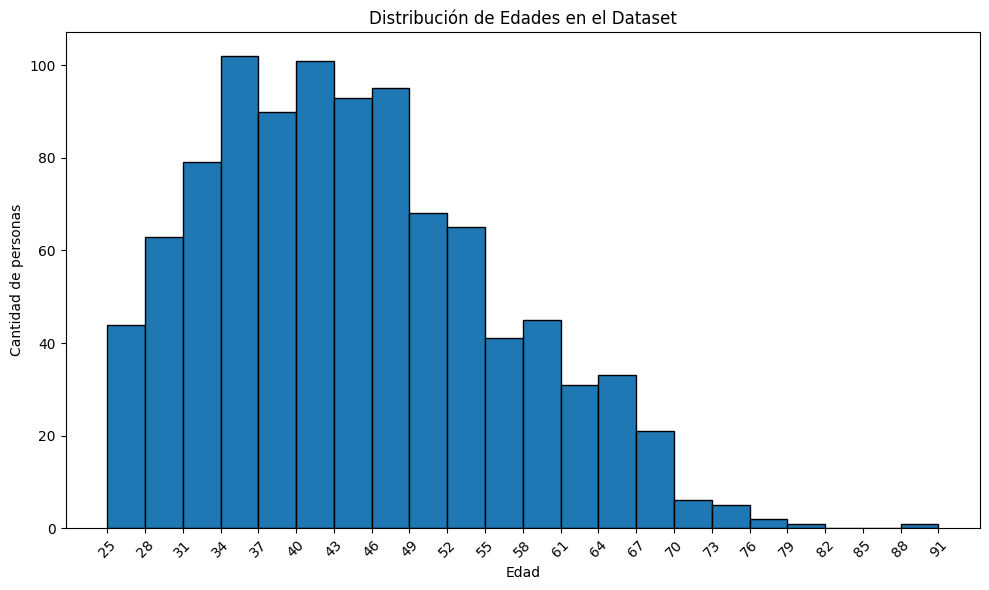

In [13]:
# Configuración de rangos personalizados para el histograma
min_age = data_selected["Age"].min()
max_age = data_selected["Age"].max()
bins = np.arange(min_age, max_age + 3, 3)

# Crear el histograma con bins personalizados
plt.figure(figsize=(10, 6))
plt.hist(data_selected["Age"], bins=bins, edgecolor="black")
plt.title("Distribución de Edades en el Dataset")
plt.xlabel("Edad")
plt.ylabel("Cantidad de personas")

# Personalización de ejes
plt.xticks(bins, rotation=45)
plt.tight_layout()
plt.show()

#### Reflexión y curiosidad en el análisis

Parece que la mayoría de las personas son jóvenes de entre 20 y 50 años, pero también encontramos un grupo de personas mayores, llegando hasta los 91 años.

Este detalle me resulta curioso, y me lleva a hacerme algunas preguntas:

- ¿Estarán comprando bicicletas para ellos mismos o para algún familiar?
- En el caso de que las compren para ellos, ¿Qué les motiva a hacerlo?
- ¿Por qué hay tan pocos compradores mayores? ¿Es una cuestión de movilidad, salud, o tal vez de estilo de vida? (Quizás sea una simple cuestión de densidad de población mayor en ciertas zonas)

Estas preguntas no son solo teóricas, ayudan a construir una imagen más rica y estratégica del cliente. Por ejemplo, si buscamos crear una campaña de marketing, no solo venderíamos una bicicleta, venderíamos la historia de una relación: como la de un abuelo que regala una bicicleta a su nieto, construyendo un vínculo duradero.

El trabajo de un científico de datos implica conectar datos con decisiones. Cada análisis es una oportunidad para comprender y resolver problemas de forma efectiva.

Quiero destacar la gran importancia de seguir nuestra curiosidad, porque si no te paras a mirar una gráfica sobre la edad porque te parece muy obvio o irrelevante, podrías no activar determinados gatillos en tu cerebro que te permitan hacerte preguntas clave para el análisis, y esto te impediría encontrar detalles valiosísimos que te hagan sacar verdadero partido a esto.

Recuerda que tu curiosidad es tu mejor aliada en cuanto a entender los datos y descubrir cómo sacarles el máximo partido.

## 1.7 Separar los datos en subconjuntos (Training y Testing)

Ahora vamos a separar nuestros datos en dos subconjuntos:

- **Conjunto de entrenamiento (training set)**: Usaremos este conjunto para entrenar al modelo.
- **Conjunto de prueba (testing set)**: Usaremos este conjunto para probar qué tan bien ha aprendido el modelo.

Para separar los datos, usaremos la función `train_test_split` de `sklearn`. **Scikit-learn** es una librería de Machine Learning muy popular con un montón de utilidades para nuestros proyectos de Machine Learning. Si quieres profundizar más en esta librería, puedes visitar su [documentación oficial](https://scikit-learn.org/stable/).

In [14]:
# Separar características (X) y etiquetas (y)
train_data = data_selected.drop(columns=["Purchased Bike"])  # Características
train_labels = data_selected["Purchased Bike"]  # Etiquetas

# Separar en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(train_data,
                                                    train_labels,
                                                    test_size=0.2,
                                                    random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")
print(f"Tamaño del conjunto de etiquetas de entrenamiento: {y_train.shape}")
print(f"Tamaño del conjunto de etiquetas de prueba: {y_test.shape}")


Tamaño del conjunto de entrenamiento: (788, 2)
Tamaño del conjunto de prueba: (198, 2)
Tamaño del conjunto de etiquetas de entrenamiento: (788,)
Tamaño del conjunto de etiquetas de prueba: (198,)


Aquí tenemos el resultado final. El conjunto de entrenamiento tiene 788 entradas, y el conjunto de prueba tiene 198.

> **Nota:** Los datos se mezclan de manera aleatoria para la división, esto es importante para que el modelo no se vea influenciado por la ordenación de los datos. El parámetro `random_state` se usa para mantener la misma mezcla cada vez que se ejecute el código y así poder comparar los resultados entre ejecuciones y al usar distintos modelos. El valor `42` es un número que se suele usar en estos casos por un tema de la cultura geek, pero realmente puedes usar tu número favorito, sólo ten en cuenta que si usas otro número, los resultados no serán los mismos que los de este notebook (te animo a experimentar). Si tienes curiosidad sobre el número 42, puedes leer más sobre ello aquí: [¿Por qué el número 42?](https://grsahagian.medium.com/what-is-random-state-42-d803402ee76b)

## 1.8 Entrenar el modelo

¡Genial! Me gusta mucho la parte de exploración de los datos, y es una parte clave en la que deberíamos pasar bastante tiempo, pero para mantener este notebook simple, vamos a ir rápidamente al grano, y vamos a entrenar nuestro modelo. (En otros notebooks podemos profundizar de manera íntegra en este apartado).

**¿Qué modelo usamos?**

Siempre es una buena idea comenzar con el modelo más simple. Esto nos da una **baseline o línea de base**: un punto de referencia inicial sobre el que podemos mejorar si lo necesitamos.

Para este ejemplo, vamos a usar **Regresión logística**, este modelo es un modelo de clasificación binaria bastante simple.

En concreto, para entrenar el modelo usaremos la función `LogisticRegression` de `sklearn`, que es una función bastante simple y que nos permite entrenar un modelo de Regresión logística de manera sencilla. Si quieres profundizar más en este modelo, puedes visitar su [documentación oficial](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression).

In [15]:
# Crear el modelo
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression()

### 1.8.1. Hacer predicciones y evaluar la precisión

Una vez entrenado el modelo, podemos usarlo para hacer predicciones tanto en el conjunto de entrenamiento como en el de prueba y ver qué tan bien funciona.

In [16]:
# Hacer predicciones 
y_train_pred = model.predict(X_train) # Conjunto de entrenamiento
y_test_pred = model.predict(X_test) # Conjunto de prueba

# Evaluar la precisión
train_accuracy = accuracy_score(y_train, y_train_pred) # Precisión en entrenamiento
test_accuracy = accuracy_score(y_test, y_test_pred) # Precisión en prueba

print(f'Precisión en el conjunto de entrenamiento: {train_accuracy * 100:.2f}%')
print(f'Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%')

Precisión en el conjunto de entrenamiento: 55.08%
Precisión en el conjunto de prueba: 60.61%


### 1.8.2. Análisis y reportes de resultados

Los resultados no parecen demasiado buenos. Si la precisión está cerca del 50%, es como si el modelo estuviera adivinando al azar. Además, la precisión en el conjunto de prueba es superior a la del conjunto de entrenamiento, lo cual es poco común y podría ser una señal de que algo no está funcionando bien.

¿Podemos confiar en un modelo así? Lógicamente no, pero nos sirve para entender el proceso, y nos da una baseline sobre la que podemos mejorar.

**Posibles causas de los resultados:**

- **Selección de Características**: Puede que edad y estado civil no sean suficientes para predecir si alguien comprará una bicicleta.
- **Simplicidad del Modelo**: Quizás un modelo más complejo podría captar patrones que la Regresión Logística no alcanza.
- **Cantidad de Datos**: Podríamos necesitar más datos para que el modelo pueda generalizar mejor.
- **Normalización de Datos**: A veces, normalizar o escalar las características ayuda a que el modelo las interprete correctamente.

La evaluación de los resultados es fundamental para entender por qué nuestro modelo se comporta de cierta manera, y tomar decisiones en base a ello.

In [17]:
# Reporte de clasificación y matriz de confusión
print("\nReporte de clasificación (conjunto de prueba):")
pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))


Reporte de clasificación (conjunto de prueba):


,0,1,accuracy,macro avg,weighted avg
precision,0.608333,0.602564,0.606061,0.605449,0.605594
recall,0.701923,0.500000,0.606061,0.600962,0.606061
f1-score,0.651786,0.546512,0.606061,0.599149,0.601807
support,104.000000,94.000000,0.606061,198.000000,198.000000


### 1.8.3. Importancia de las características

Como estamos usando un modelo de regresión logística, podemos observar la importancia relativa de cada característica en la predicción. Esto se refiere a cuánto "peso" le da el modelo a cada variable para tomar la decisión de si alguien comprará una bicicleta o no.

En la gráfica que verás a continuación, los coeficientes son negativos , esto significa que el modelo considera que esas características disminuyen la probabilidad de compra de una bicicleta. Cuanto más negativo es el coeficiente, mayor es el "impacto negativo" de esa característica en la predicción.

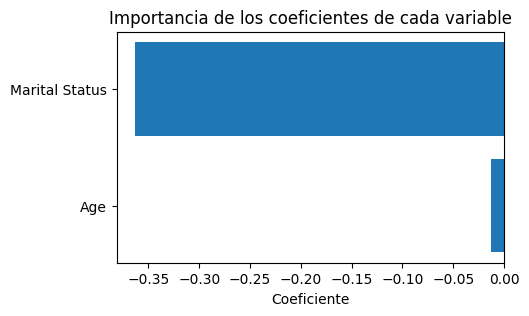

In [18]:
# Visualizar la importancia relativa de los coeficientes
feature_names = train_data.columns  # Nombres de las columnas de características
coef = model.coef_[0]  # Coeficientes de cada variable

plt.figure(figsize=(5, 3))
plt.barh(feature_names, coef)  # Etiquetas en el eje Y
plt.xlabel("Coeficiente")
plt.title("Importancia de los coeficientes de cada variable")
plt.show()


En este caso, vemos que la variable "Marital Status" (estado civil) tiene un coeficiente negativo considerable, mientras que "Age" (edad) tiene un coeficiente negativo menor. Esto indica que el modelo "cree" que las personas casadas tienden a comprar menos bicicletas. Aunque, si revisamos los datos, veremos que esta diferencia en realidad no es tan significativa.

Por ejemplo, vamos a contar cuántas personas casadas y solteras compraron bicicletas en nuestros datos:

In [19]:
print("Cantidad de personas casadas que han comprado una bicicleta:",
      data_selected[(data_selected['Marital Status'] == 1) & (data_selected['Purchased Bike'] == 1)].shape[0])
print("Cantidad de personas solteras que han comprado una bicicleta:",
      data_selected[(data_selected['Marital Status'] == 0) & (data_selected['Purchased Bike'] == 1)].shape[0])

Cantidad de personas casadas que han comprado una bicicleta: 227
Cantidad de personas solteras que han comprado una bicicleta: 246


Como ves, aunque hay una diferencia, no es tan grande. Esto nos indica que el modelo puede estar sesgado. Es un buen ejemplo de cómo los modelos pueden interpretar relaciones que no siempre coinciden con nuestra intuición o con lo que observamos al revisar los datos.

### 1.8.4. Matriz de confusión

Una forma efectiva y visual (y de mis favoritas) de evaluar el rendimiento de un modelo es mediante la matriz de confusión. Esta matriz nos muestra cuántas veces el modelo ha acertado y cuántas ha fallado, además de qué tipo de aciertos y errores ha cometido.

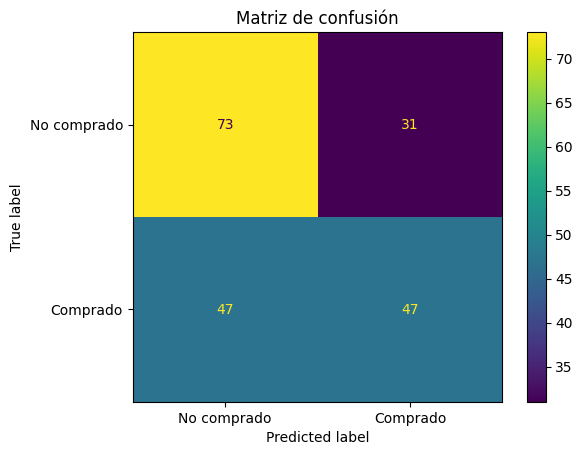

In [20]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostrar la matriz de confusión con etiquetas
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["No comprado", "Comprado"])
plt.title("Matriz de confusión")
plt.show()

En la matriz de confusión, vemos lo siguiente:

- La **diagonal descendente** (de la esquina superior izquierda a la inferior derecha) muestra los aciertos del modelo:
    - Arriba a la izquierda: Predijo correctamente "No comprado" (Verdaderos Negativos).
    - Abajo a la derecha: Predijo correctamente "Comprado" (Verdaderos Positivos).
- La **diagonal ascendente** (de la esquina inferior izquierda a la superior derecha) muestra los errores del modelo:
    - Abajo a la izquierda: Predijo "No comprado" cuando en realidad era "Comprado" (Falsos Negativos).
    - Arriba a la derecha: Predijo "Comprado" cuando en realidad era "No comprado" (Falsos Positivos).

En este caso específico, el modelo acertó en 120 casos (73 Verdaderos Negativos y 47 Verdaderos Positivos), y falló en 78 casos (47 Falsos Negativos y 31 Falsos Positivos). Esto nos da una buena idea de cómo se comporta el modelo y hacia dónde puede estar sesgado.

#### Análisis de rendimiento: Recall y Precisión

En términos de métricas de rendimiento, podemos analizar dos conceptos clave:

- **Recall (sensibilidad)**: Indica la capacidad del modelo para encontrar todos los casos positivos. En este contexto, nos dice qué tan bien el modelo identifica a los compradores de bicicletas.
- **Precisión**: Mide cómo de preciso es el modelo al hacer una predicción positiva, es decir, qué porcentaje de las predicciones "Comprado" eran realmente correctas.

Puedes volver al punto 1.8.2. (Análisis y reportes de resultados) para ver las métricas de nuestro modelo.

>**Nota:** Dependiendo del caso, a veces es más importante optimizar una métrica que otra. Si quieres profundizar en estos conceptos, te recomiendo explorar este [fragmento de curso de Machine Learning de Google](https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall?hl=es-419) en el que tienes un apartado interactivo en el que puedes ver cómo afecta el rendimiento de un modelo a distintas métricas.

## 1.9. Probando nuestro modelo: Simulación de despliegue

Ahora que tenemos nuestro modelo entrenado, imaginemos que lo desplegamos en nuestra tienda de bicicletas para ayudarnos a identificar posibles compradores. Esto nos permitirá enfocar nuestros esfuerzos de marketing y ofrecer una atención personalizada a los clientes con mayor probabilidad de comprar una bicicleta.

Para simular este escenario, vamos a crear un pequeño dataset sintético que represente a 10 personas que han visitado nuestra tienda hoy.

In [21]:
# Crear un pequeño dataset sintético
potential_customers = pd.DataFrame({
    "Age": [random.randint(18, 90) for _ in range(10)],
    "Marital Status": [random.choice([1, 0]) for _ in range(10)]
})

potential_customers

,Age,Marital Status
0,36,1
1,33,1
2,78,0
3,60,1
4,22,1
5,83,1
6,34,1
7,45,1
8,20,1
9,83,0


### 1.9.1. Predicción sobre el dataset sintético

Ahora vamos a utilizar nuestro modelo para predecir si cada cliente es probable que compre una bicicleta. Añadimos una columna con las predicciones al dataset.

In [22]:
# Prediciendo sobre el dataset sintético
potential_customers["Purchased Bike"] = model.predict(potential_customers[["Age", "Marital Status"]])
potential_customers

,Age,Marital Status,Purchased Bike
0,36,1,0
1,33,1,0
2,78,0,0
3,60,1,0
4,22,1,1
5,83,1,0
6,34,1,0
7,45,1,0
8,20,1,1
9,83,0,0


En esta tabla final, "Purchased Bike" indica si el modelo predice que el cliente comprará (1) o no comprará (0) una bicicleta. Esta información podría ser muy útil para personalizar la atención al cliente en tiempo real. Si nuestro modelo funcionara de manera precisa, nos permitiría priorizar recursos de venta y marketing hacia los clientes con mayor probabilidad de compra, maximizando la efectividad de nuestras estrategias. Sin duda, un modelo muy útil si tuviéramos una tienda de bicicletas.

### 1.9.2. Próximos pasos para mejorar el modelo

Para optimizar el rendimiento del modelo y su utilidad en situaciones reales, podríamos considerar:

- **Probar con otros parámetros:** Ajustar los hiperparámetros del modelo para mejorar su precisión.
- **Normalizar o escalar los datos:** Asegurarnos de que todas las variables están en escalas comparables para evitar sesgos en el modelo.
- **Explorar otros modelos de clasificación:** Probar algoritmos adicionales como árboles de decisión, SVM o redes neuronales para comparar su rendimiento.
- **Incluir más características:** Si tenemos acceso a más datos sobre los clientes (como ingresos, ocupación o distancia de desplazamiento), podríamos mejorar la precisión del modelo.

Para concluir, vamos a ver un ejemplo final donde unimos todos estos elementos para entrenar un nuevo modelo usando el conjunto completo de datos y aplicando algunas mejoras.


## 1.10. Ejemplo usando todos los datos


Para cerrar con este caso práctico, voy a juntar todo lo que hemos visto en un único bloque en el que usaremos todos los datos para ver si así mejora el rendimiento del modelo.


In [23]:
# Eliminar filas con datos faltantes
data = data.dropna()

# Eliminar la columna "ID" (no es una característica relevante para la predicción)
data = data.drop(columns=["ID"])

# Separar las etiquetas
labels = data['Purchased Bike']
# Eliminar la etiqueta de los datos para quedarnos con las características
features = data.drop(columns=['Purchased Bike'])

# Dividir los datos en conjuntos de entrenamiento y prueba **antes del preprocesamiento**
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42)

# Identificar las columnas categóricas y numéricas
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

print(f"Columnas categóricas: {list(categorical_cols)}")
print(f"Columnas numéricas: {list(numeric_cols)}")

# Crear transformadores para las columnas numéricas y categóricas
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Crear un ColumnTransformer que aplique los transformadores adecuados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Si la variable objetivo es categórica, codificarla
if y_train.dtype == 'object':
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

# Crear un pipeline que incluya el preprocesamiento y el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Realizar predicciones
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluar el modelo
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Precisión en el conjunto de entrenamiento: {train_accuracy * 100:.2f}%')
print(f'Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%')
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_pred))


Columnas categóricas: ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region']
Columnas numéricas: ['Income', 'Children', 'Cars', 'Age']
Precisión en el conjunto de entrenamiento: 65.97%
Precisión en el conjunto de prueba: 64.40%

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.61      0.73      0.67        93
           1       0.69      0.56      0.62        98

    accuracy                           0.64       191
   macro avg       0.65      0.65      0.64       191
weighted avg       0.65      0.64      0.64       191



Podemos observar que el modelo ha mejorado con respecto al ejemplo anterior, aunque aún tiene margen de mejora. Este incremento en el rendimiento sugiere que el uso de características adicionales en el entrenamiento ayuda a mejorar la precisión del modelo. Sin embargo, los resultados siguen siendo bastante pobres, esto indica que podemos seguir ajustando o mejorando el modelo bastante para obtener predicciones más precisas.

También notamos una diferencia esperada en el rendimiento entre los conjuntos de entrenamiento (65.97%) y de prueba (64.40%). Esto es más normal y muestra que el modelo se ajusta razonablemente bien a los datos de entrenamiento sin mostrar un sobreajuste excesivo.

### 1.10.1. Análisis de los Coeficientes del Modelo

Ahora vamos a visualizar los coeficientes del modelo nuevamente, esta vez con todos los datos, para interpretar la importancia relativa de cada característica en las predicciones.

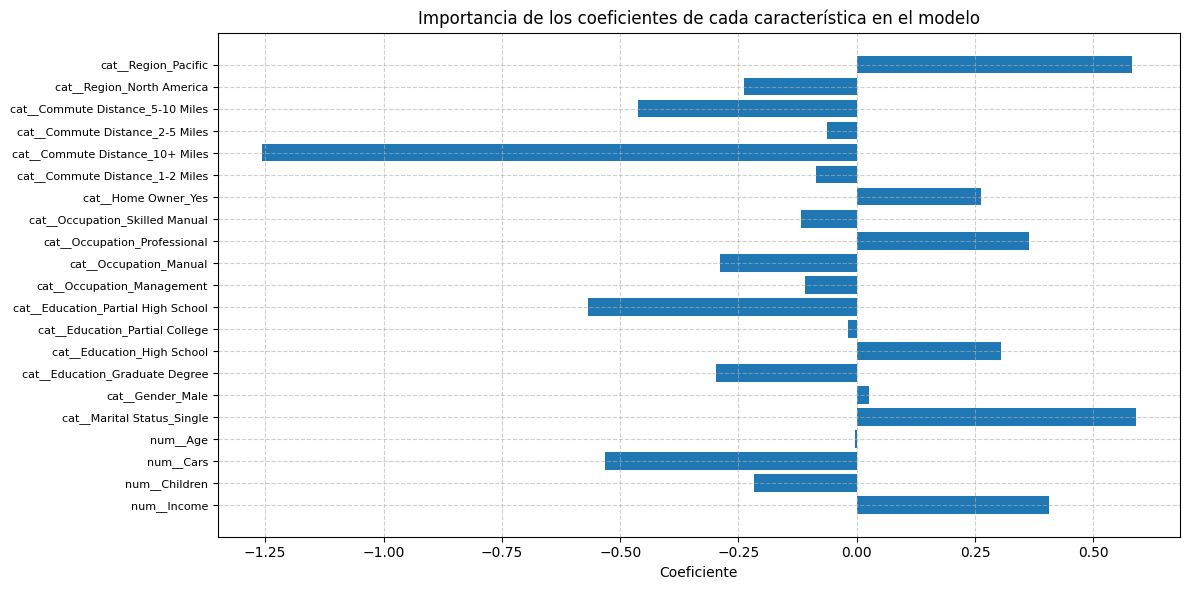

In [24]:
# Obtener los nombres de las características después del preprocesamiento
feature_names = preprocessor.get_feature_names_out()

# Obtener los coeficientes del modelo
coef = pipeline.named_steps['classifier'].coef_[0]

# Crear la gráfica de importancia de coeficientes
plt.figure(figsize=(12, 6))
plt.barh(range(len(coef)), coef)
plt.yticks(range(len(coef)), feature_names, fontsize=8)
plt.xlabel("Coeficiente")
plt.title("Importancia de los coeficientes de cada característica en el modelo")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

En la gráfica, observamos varios patrones interesantes:

- **Trayectos largos con correlación negativa**: Las personas con desplazamientos superiores a 10 millas (~16 km) muestran menor probabilidad de comprar una bicicleta, probablemente porque no consideran la bicicleta como una opción práctica para su trayecto. Otras distancias también muestran una tendencia negativa, aunque menos pronunciada.
- **Personas solteras con correlación positiva**: Estar soltero parece ser un predictor de compra de bicicletas, lo que sugiere que las personas solteras podrían estar más inclinadas a usarlas para transporte o recreación.
- **Ingresos con correlación positiva**: A mayor ingreso, mayor es la probabilidad de comprar una bicicleta, lo cual es bastante intuitivo.

Explorar estos resultados es útil para identificar patrones que pueden influir en nuestra estrategia de ventas en la tienda de bicicletas. Sin embargo, es fundamental recordar que los coeficientes del modelo reflejan correlación y no causalidad. Esto significa que, aunque el modelo identifica asociaciones útiles, no podemos asumir que una característica provoca el comportamiento de compra. Cuanto mejor sea nuestro modelo, más fiel será esta interpretación, pero siempre teniendo en cuenta que es una interpretación.

### 1.10.2. Matriz de confusión

Para finalizar, veamos la matriz de confusión del nuevo modelo.

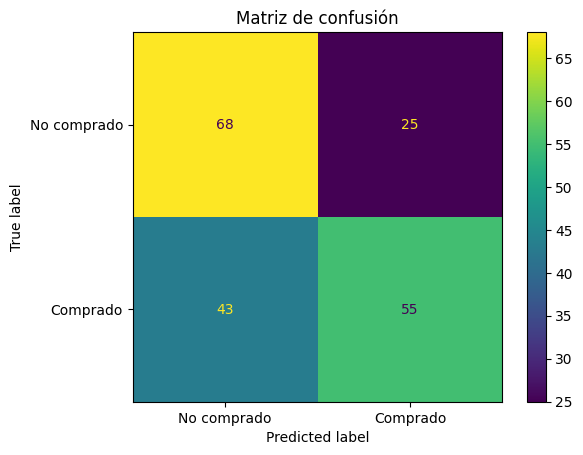

In [25]:
# Realizar predicciones usando el pipeline completo
y_pred = pipeline.predict(X_test)

# Mostrar la matriz de confusión con etiquetas
ConfusionMatrixDisplay.from_estimator(
    pipeline, 
    X_test, 
    y_test, 
    display_labels=["No comprado", "Comprado"]
)
plt.title("Matriz de confusión")
plt.show()

# 2. Regresión para la Predicción de Satisfacción del Cliente

Imaginemos ahora que estamos trabajando en el equipo de análisis de una empresa que se enfoca en la satisfacción del cliente. Nuestra tarea será crear un modelo de Machine Learning que permita predecir el nivel de satisfacción de los clientes en base a varios factores demográficos y de comportamiento.

Para este ejemplo, vamos a usar un dataset sintético de kaggle: [Customer Feedback and Satisfaction](https://www.kaggle.com/datasets/jahnavipaliwal/customer-feedback-and-satisfaction). Este dataset contiene datos de 38,444 clientes. Cada fila representa a un cliente, y cada columna describe alguna característica relevante de esa persona o su experiencia con los productos y servicios.

El dataset incluye una columna especial llamada `SatisfactionScore`, que representa el nivel de satisfacción del cliente como un valor entre **1** y **100**. Nuestro objetivo es predecir este puntaje de satisfacción para ayudar a la empresa a mejorar la experiencia de sus clientes.

Estos son los datos con los que contamos:
- **CustomerID**: Un identificador único para cada cliente.

**Características**:
- **Age**: Edad del cliente.
- **Gender**: Género del cliente.
- **Country**: País de residencia (USA, Canadá, UK, Alemania, Francia).
- **Income**: Ingreso anual del cliente.
- **ProductQuality**: Calificación de la calidad del producto, en una escala de 1 a 10.
- **ServiceQuality**: Calificación de la calidad del servicio, en una escala de 1 a 10.
- **PurchaseFrequency**: Número de compras realizadas por el cliente en el último año.
- **FeedbackScore**: Puntaje general de retroalimentación (clasificado en Bajo, Medio o Alto).
- **LoyaltyLevel**: Nivel de lealtad del cliente (Bronce, Plata, Oro).

**Variable Objetivo**:
- **SatisfactionScore**: Representa el nivel de satisfacción del cliente, que queremos predecir como un valor numérico entre 1 y 100.

Dado que nuestro objetivo es predecir un valor numérico (el nivel de satisfacción), lo que tenemos entre manos es un problema de regresión. Con esta predicción, la empresa podrá identificar los factores que más afectan a la satisfacción del cliente y ajustar sus estrategias de producto y servicio para mejorar la experiencia general.

## 2.1. Descargar el Dataset

Este Dataset se puede descargar directamente desde kaggle: [Enlace al Dataset](https://www.kaggle.com/datasets/jahnavipaliwal/customer-feedback-and-satisfaction). Para descargarlo, necesitas estar registrado en kaggle, pero para simplificar las cosas, he subido el Dataset a una carpeta compartida de Google Drive, y puedes simplemente ejecutar el código siguiente para descargarlo y usarlo.

> **Nota:** Si estás usando Google Colab, los archivos se descargan en tu equipo de manera temporal mientras dure la sesión en el entorno de ejecución, luego se borrarán y todo quedará limpio, si quieres guardarlos en tu sistema, tienes que descargarlos manualmente.

In [26]:
# Detectar si estamos en Colab
in_colab = 'google.colab' in str(get_ipython())

if in_colab:
    # Descargar el archivo helper_functions.py desde el repositorio de GitHub
    !mkdir -p /content/utils # Creamos una carpeta utils para que coincida con la estructura del repositorio
    !wget -O utils/helper_functions.py "https://raw.githubusercontent.com/ManuelEspejo/Machine-Learning-Bases/main/utils/helper_functions.py"
    data_dir = '/content/data' # Ruta de los datos
else:
    # Agregar el directorio raíz al path de Python (Para ejecutar en local)
    notebook_dir = os.path.dirname(os.path.abspath('__file__'))
    project_dir = os.path.dirname(notebook_dir)
    sys.path.append(project_dir)
    data_dir = '../data/raw'

In [27]:
# Descargamos los datos desde el enlace compartido de google Drive
download_data('https://drive.google.com/uc?id=1DyQ3gjcyoOSDWmQO4t-0CcJTe0QTJWlm')

Descargando desde Google Drive...
Tamaño del archivo ZIP: 562273 bytes
Contenido del ZIP: ['customer_feedback_satisfaction.csv']

Archivos disponibles:
- bike_buyers.csv (87182 bytes)
- bike_buyers_clean.csv (86348 bytes)
- CC GENERAL.csv (902879 bytes)
- customer_feedback_satisfaction.csv (1963795 bytes)


## 2.2. Explorar los datos

Como estamos trabajando con un archivo `.csv`, seguiremos un flujo de trabajo similar al del ejemplo anterior.

In [28]:
# Cargar los datos
data = pd.read_csv(data_dir + '/customer_feedback_satisfaction.csv')

# Mostrar las primeras filas del dataset
data.head()

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


### 2.2.1. Información general del dataset

Para entender la estructura y el contenido, veamos el tipo de datos, el tamaño del conjunto y un resumen estadístico.

Para el resúmen estadístico, podemos usar el método `describe()`, que nos da una visión general de las características numéricas del dataset.

In [29]:
# Dimensiones del dataset
print(f"El dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas.\n")

# Información general de los datos
data.info()

# Descripción estadística de las características numéricas
data.describe()

El dataset tiene 38444 filas y 11 columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         38444 non-null  int64  
 1   Age                38444 non-null  int64  
 2   Gender             38444 non-null  object 
 3   Country            38444 non-null  object 
 4   Income             38444 non-null  int64  
 5   ProductQuality     38444 non-null  int64  
 6   ServiceQuality     38444 non-null  int64  
 7   PurchaseFrequency  38444 non-null  int64  
 8   FeedbackScore      38444 non-null  object 
 9   LoyaltyLevel       38444 non-null  object 
 10  SatisfactionScore  38444 non-null  float64
dtypes: float64(1), int64(6), object(4)
memory usage: 3.2+ MB


,CustomerID,Age,Income,ProductQuality,ServiceQuality,PurchaseFrequency,SatisfactionScore
count,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000
mean,19222.500000,43.496853,75076.619238,5.494746,5.492769,10.453881,85.276409
std,11097.971211,14.972748,25975.752966,2.873192,2.875812,5.765621,16.898577
min,1.000000,18.000000,30001.000000,1.000000,1.000000,1.000000,4.280000
25%,9611.750000,31.000000,52624.500000,3.000000,3.000000,5.000000,74.470000
50%,19222.500000,43.000000,75236.000000,5.000000,5.000000,10.000000,91.270000
75%,28833.250000,56.000000,97606.750000,8.000000,8.000000,15.000000,100.000000
max,38444.000000,69.000000,119999.000000,10.000000,10.000000,20.000000,100.000000


No hace falta que hagas un análisis exhaustivo de estos datos, lo que quiero demostrar aquí es cómo con unas pocas líneas de código de exploración sobre nuestros datos, somos capaces de obtener tanta información.

Algunas cosas que se pueden ver aquí:

1. **Sobre nuestros clientes:**
- **Edad:** Tenemos un rango de edades que va desde los 18 a los 69 años, con una media de 43 años.
- **Ingreso:** El ingreso anual de los clientes varía entre 30,001 y 119,999 dólares, con un promedio de 75,076. Esto nos muestra que nuestros clientes tienen un buen poder adquisitivo.
2. **Calidad de producto y servicio:**
- Ambas variables (`ProductQuality` y `ServiceQuality`) están situadas en una escala de 1 a 10, con un valor promedio de alrededor de 5.5. Esto nos indica que, en general, la percepción de calidad de los clientes es moderada, sin fuertes inclinaciones hacia calificaciones muy bajas o muy altas.
3. **Frecuencia de compra:**
- La frecuencia de compra anual promedio es aproximadamente de 10 compras, con un rango de 1 a 20. Esto nos da una idea del nivel de actividad de compra de los clientes.
4. **Puntuación de satisfacción:**
- La satisfacción tiene un promedio de 85, con una gran variabilidad (rango de 4.28 a 100). Esto significa que aunque la mayoría de los clientes están satisfechos, hay una fracción que expresa niveles muy bajos de satisfacción, una posible área de mejora.

### 2.2.2. Análisis visual

Para visualizar esta información, vamos a enfocarnos en dos gráficos para no sobrecargar de información.

1. **Distribución de SatisfactionScore:** Esta visualización nos muestra la diversidad en la satisfacción, y nos permite observar verdaderamente cuántos clientes están en un bajo rango de satisfacción.
2. **Distribución de Ingresos:** Esto es útil para ver la dispersión y entender si el nivel de ingresos tiene algún impacto en la satisfacción.

> **Nota:** Cuando hablamos de "dispersión" nos referimos a qué tan distribuidos están los ingresos entre los clientes, es decir, si los ingresos de los clientes están muy cerca unos de otros o si, por el contrario, hay mucha diferencia entre ellos (clientes con ingresos muy altos y clientes con ingresos muy bajos).

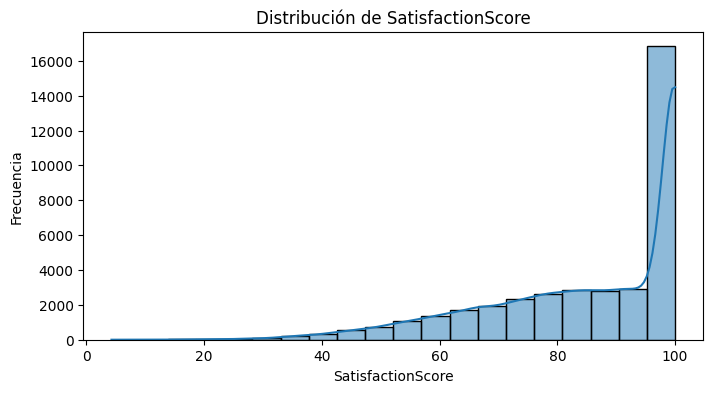

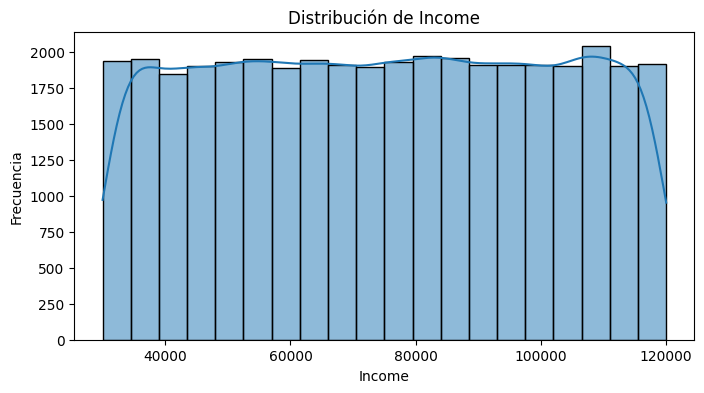

In [30]:
# Gráfico de distribución de SatisfactionScore
plt.figure(figsize=(8, 4))
sns.histplot(data['SatisfactionScore'], bins=20, kde=True)
plt.title('Distribución de SatisfactionScore')
plt.xlabel('SatisfactionScore')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de distribución de Ingresos
plt.figure(figsize=(8, 4))
sns.histplot(data['Income'], bins=20, kde=True)
plt.title('Distribución de Income')
plt.xlabel('Income')
plt.ylabel('Frecuencia')
plt.show()

#### Conclusiones

1. **Satisfacción de los Clientes:** La mayoría de los clientes están muy satisfechos, con puntuaciones cercanas al 100%. En lugar de intentar mejorar la satisfacción de aquellos pocos clientes con puntuaciones muy bajas (posiblemente casos aislados), podría tener más sentido enfocarse en convertir a los clientes con satisfacción media-alta (60-90%) en clientes plenamente satisfechos.
2. **Distribución de Ingresos:** Los clientes tienen una distribución de ingresos bastante equilibrada. Esto permite segmentar las estrategias de marketing para diferentes grupos de ingresos. Podemos ajustar las campañas y el mensaje para atraer a cada segmento, reforzando la percepción de valor del producto para todos los niveles económicos.

Estos resultados nos dan pistas valiosas y posibles líneas de investigación. Lo importante aquí es entender que:

- **Objetivo o problema a resolver:** Antes de lanzarte a explorar los datos, asegúrate de tener claro el objetivo. En este caso, queremos predecir la satisfacción de los clientes, así que la mayoría de nuestras decisiones y análisis deben ir en esa dirección. Sin embargo, es común encontrar ideas inesperadas en el análisis que podrían ser útiles. Depende de ti decidir si vale la pena explorarlas en base al coste-beneficio.

- **Mirar los datos desde diferentes ángulos:** Aunque algunos análisis parezcan obvios, los datos pueden sorprendernos. Examinar los datos desde varios ángulos, como usando diferentes tipos de gráficos o estadísticas (promedio, mediana, etc.), puede revelar patrones o relaciones inesperadas que podrían ser clave para alcanzar nuestro objetivo.

## 2.3. División de datos en conjuntos de entrenamiento y prueba

Vamos a dividir los datos en conjuntos de entrenamiento y prueba, como hicimos en el apartado 1.7.


In [31]:
# Separar características y variable objetivo, y eliminar CustomerID
X = data.drop(['CustomerID', 'SatisfactionScore'], axis=1)
y = data['SatisfactionScore']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")
print(f"Tamaño del conjunto de etiquetas de entrenamiento: {y_train.shape}")
print(f"Tamaño del conjunto de etiquetas de prueba: {y_test.shape}")

Tamaño del conjunto de entrenamiento: (30755, 9)
Tamaño del conjunto de prueba: (7689, 9)
Tamaño del conjunto de etiquetas de entrenamiento: (30755,)
Tamaño del conjunto de etiquetas de prueba: (7689,)


## 2.4. Preprocesamiento de datos

El preprocesamiento, como vimos antes, es una fase clave en Machine Learning. Aquí es donde transformamos los datos para que el modelo los entienda mejor y pueda trabajar de manera óptima.

Vamos a cubrir tres aspectos clave:
1. **Manejo de datos faltantes**
2. **Transformación de datos categóricos**
3. **Escalado de características**

### 2.4.1. Manejo de datos faltantes

En este caso, buenas noticias: ¡no tenemos datos faltantes! Esto nos ahorra tener que rellenar o eliminar datos, así que podemos ir directo a los siguientes pasos.

In [32]:
print("Cantidad de datos faltantes en el dataset:")
print("*" * 50)
print(data.isnull().sum())

Cantidad de datos faltantes en el dataset:
**************************************************
CustomerID           0
Age                  0
Gender               0
Country              0
Income               0
ProductQuality       0
ServiceQuality       0
PurchaseFrequency    0
FeedbackScore        0
LoyaltyLevel         0
SatisfactionScore    0
dtype: int64


### 2.4.2. Transformación de datos

#### Datos categóricos: One-hot encoding

En esta ocasión, para trabajar con los datos categóricos, vamos a transformarlos en datos numéricos haciendo uso de **one-hot encoding**.

Con **one-hot encoding**, cada categoría única de una variable se convierte en una columna independiente que contiene solo ceros y unos. Así, en lugar de asignar un número arbitrario a cada categoría, creamos una columna "binaria" para cada una. Esta codificación es más amigable para el modelo, ya que evita introducir relaciones ficticias entre categorías.

Aquí tienes un ejemplo sencillo:

|Color | rojo | verde | azul
|------|------|-------|-----
|rojo | 1    | 0    | 0
|verde| 0    | 1    | 0
|azul | 0    | 0    | 1


En este caso, cada color se convierte en una columna propia. Si un registro es "rojo", esa columna se marca con un 1, mientras que las demás columnas se quedan en 0.

**¿Por qué no simplemente usamos números enteros para cada categoría?**

Si asignáramos 1 a "rojo", 2 a "verde" y 3 a "azul", el modelo podría interpretar erróneamente que "azul" es "mayor" que "verde", o que existe una relación matemática entre estos colores, cuando en realidad son categorías independientes. Con one-hot encoding evitamos este problema al crear columnas separadas para cada uno de ellos.

#### Datos numéricos: Escalado

También vamos a aplicar una transformación a las características numéricas para que todas ellas tengan el mismo rango de valores.

Las características numéricas ahora mismo tienen distintos rangos. Por ejemplo, `Age` va desde 18 a 69, `Income` desde 30.001 a 119.999.

Al estandarizarlas (normalizarlas) nos aseguramos de que nuestro modelo no le de más peso a las variables con valores mayores sólo por tener un rango más amplio.

In [33]:
# Visualizar los datos categóricos
print(f"Género: {data['Gender'].unique()}")
print(f"País: {data['Country'].unique()}")
print(f"Puntaje de retroalimentación: {data['FeedbackScore'].unique()}")
print(f"Nivel de lealtad: {data['LoyaltyLevel'].unique()}")

Género: ['Male' 'Female']
País: ['UK' 'USA' 'France' 'Germany' 'Canada']
Puntaje de retroalimentación: ['Low' 'Medium' 'High']
Nivel de lealtad: ['Bronze' 'Gold' 'Silver']


#### Implementación del Preprocesamiento con un Pipeline


In [34]:
# Definir las características numéricas y categóricas
numerical_features = ['Age', 'Income', 'ProductQuality', 'ServiceQuality', 'PurchaseFrequency']
categorical_features = ['Gender', 'Country', 'FeedbackScore', 'LoyaltyLevel']

# Preprocesamiento para datos numéricos (escalado)
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocesamiento para datos categóricos (one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Combinar transformaciones usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crear pipeline completo con preprocesamiento y modelo
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Aplicar preprocesamiento
X_preprocessed = preprocessor.fit_transform(X)

Para automatizar el preprocesamiento hemos creado un **pipeline**. "Pipeline" se puede traducir aquí como "flujo de procesamiento" o "proceso automatizado". Básicamente, sería un flujo de tareas que se encarga de preparar los datos antes de ser utilizados por el modelo.

Hay muchos tipos de pipelines de preprocesamiento, que se pueden combinar para crear pipelines más complejos, incluyendo técnicas de reducción de dimensionalidad, selección de características, tratamiento de outliers o valores nulos, etc.

Para este caso, este pipeline se encarga de estandarizar las características numéricas y aplicar one-hot encoding a las categóricas.

Si te fijas en el código, el pipeline está formado por dos partes:

```python
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # Preprocesador
    ('regressor', LinearRegression()) # Modelo
])
```
1. `preprocessor`: Este es el preprocesador que hemos definido anteriormente, que se encarga de estandarizar las características numéricas y aplicar one-hot encoding a las categóricas.
2. `regressor`: Este es el modelo que usaremos para hacer las predicciones. En este caso, usamos un modelo de regresión lineal.

### 2.4.3. Visualizando datos preprocesados

Vamos a visualizar una muestra de datos antes y después de aplicar el preprocesamiento para ver las diferencias.

In [35]:
# Muestra de datos preprocesados
print(f"Datos preprocesados de un cliente: {X_preprocessed[0]}")
print(f"Satisfacción del cliente: {y[0]}")

# Visualización en formato de tabla
pd.DataFrame(X_preprocessed, columns=preprocessor.get_feature_names_out()).head(1)

Datos preprocesados de un cliente: [ 0.83507114  0.30865265 -0.17219594  0.87184548 -0.94594346  1.
  0.          0.          1.          0.          1.          0.
  0.          0.        ]
Satisfacción del cliente: 100.0


,num__Age,num__Income,num__ProductQuality,num__ServiceQuality,num__PurchaseFrequency,cat__Gender_Male,cat__Country_France,cat__Country_Germany,cat__Country_UK,cat__Country_USA,cat__FeedbackScore_Low,cat__FeedbackScore_Medium,cat__LoyaltyLevel_Gold,cat__LoyaltyLevel_Silver
0,0.835071,0.308653,-0.172196,0.871845,-0.945943,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [36]:
# Visualizando muestra original
data.head(1)

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0


A continuación, vamos a visualizar cómo el preprocesamiento afecta las características numéricas en el gráfico:

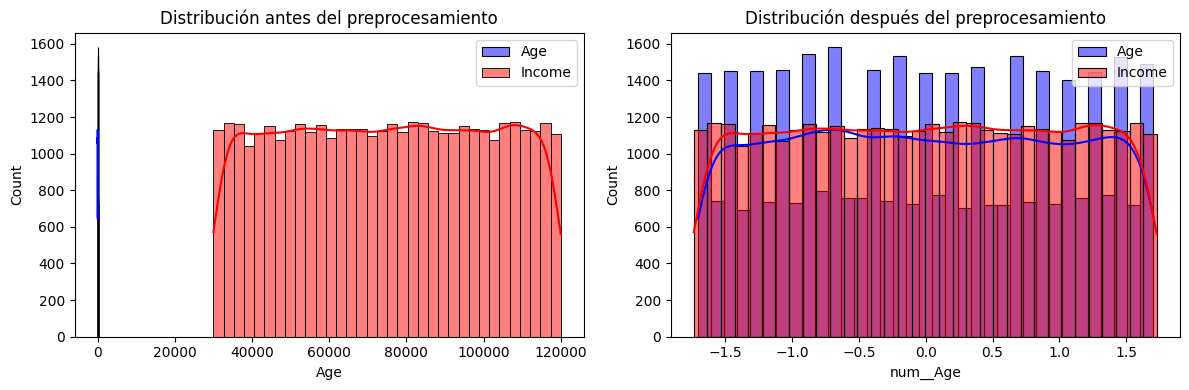

In [37]:
# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico antes del preprocesamiento
sns.histplot(data=data['Age'], color='blue', label='Age', ax=ax1, alpha=0.5, kde=True)
sns.histplot(data=data['Income'], color='red', label='Income', ax=ax1, alpha=0.5, kde=True)
ax1.set_title('Distribución antes del preprocesamiento')
ax1.legend()

# Convertir datos preprocesados a DataFrame
X_processed_df = pd.DataFrame(
    X_preprocessed, 
    columns=preprocessor.get_feature_names_out()
)

# Gráfico después del preprocesamiento
sns.histplot(data=X_processed_df['num__Age'], color='blue', label='Age', ax=ax2, alpha=0.5, kde=True)
sns.histplot(data=X_processed_df['num__Income'], color='red', label='Income', ax=ax2, alpha=0.5, kde=True)
ax2.set_title('Distribución después del preprocesamiento')
ax2.legend()

plt.tight_layout()
plt.show()

**¿Por qué es útil este preprocesamiento?**

En el gráfico de la izquierda (antes del preprocesamiento), vemos que `Age` y `Income` tienen rangos muy distintos: La edad varía entre 18 y 69, mientras que los ingresos va desde 30,000 hasta casi 120,000. Esto podría hacer que el modelo dé un peso indebido a la variable `Income`, solo porque sus valores son mayores.

En el gráfico de la derecha (después del preprocesamiento), ambas variables están en un rango similar gracias al escalado, lo cual hace que el modelo trate ambas variables de forma equilibrada, sin que ninguna tenga "ventaja" por su escala. Así, el modelo puede enfocarse en las relaciones reales entre las variables y la satisfacción del cliente, en lugar de verse confundido por las diferencias en sus valores.

Este ajuste simple es clave para asegurar que el modelo interprete los datos correctamente y que los resultados reflejen mejor la realidad.

## 2.5. Entrenar y evaluar el modelo

Ahora que hemos preprocesado los datos, vamos a entrenar nuestro modelo de **regresión lineal**.

Un modelo de regresión lineal busca la mejor línea que se ajuste a los datos. En nuestro caso, intentará encontrar la relación entre las características de cada cliente (edad, ingresos, calidad del producto, etc.) y su nivel de satisfacción. Este tipo de modelo es como un "predicador de tendencias": busca patrones en los datos y traza una línea que represente la mejor aproximación de esas tendencias.

> Nota: Al final del notebook (en las conclusiones) encontrarás una breve reflexión sobre la linealidad que te ayudará a entender mejor este modelo y sus limitaciones.


### 2.5.1. Entrenar el modelo

Entrenamos al modelo con nuestros datos de entrenamiento.

In [38]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Income',
                                                   'ProductQuality',
                                                   'ServiceQuality',
                                                   'PurchaseFrequency']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender', 'Country',
                                                   'FeedbackScore',
                                                   'LoyaltyLevel'])])),
                ('regressor', LinearRegression())])

### 2.5.2. Evaluar el modelo

Ahora, evaluaremos el modelo en el conjunto de prueba (los datos que todavía no ha visto), esto nos ayuda a verificar si realmente ha aprendido algo útil.

In [39]:
# Hacer predicciones en el conjunto de prueba
y_pred = model_pipeline.predict(X_test)

# Evaluar al modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 84.92
R^2 Score: 0.70


Estamos usando dos métricas de evaluación que nos dan una idea de qué tan bien el modelo está funcionando:

- **Mean Squared Error (MSE):** Esta métrica calcula el promedio de los errores al cuadrado entre las predicciones y los valores reales. Cuanto menor sea el MSE, mejor será el modelo, ya que indica que el modelo se está acercando a los valores reales. En términos prácticos, un MSE bajo significa que el modelo está prediciendo de forma bastante precisa.
- **R^2 Score:** Esta métrica mide qué tan bien el modelo explica la variabilidad de los datos. Un R² de 1 significa que el modelo explica el 100% de la variabilidad en los datos, mientras que un R² de 0 significa que no explica ninguna variabilidad. En el contexto de negocio, un R² alto nos indica que el modelo es bastante confiable para hacer predicciones, mientras que un valor bajo nos sugiere que el modelo podría necesitar ajustes o datos adicionales para mejorar.

En conclusión, si tenemos un MSE bajo y un R² alto, podemos confiar en la capacidad de nuestro modelo para predecir la satisfacción del nuestros clientes.

En este caso, al tener una escala de 0 a 100, un MSE de 84.92 es bastante elevado. Esto indica que las predicciones que realiza suelen estar lejos de llos valores reales, y pyede estar fallando en capturar patrones importantes de la relación entre variables.

## 2.6. Visualización de resultados

Para entender mejor cómo se comporta el modelo, vamos a visualizar sus predicciones frente a los valores reales de satisfacción. Esto nos dará una visión más intuitiva y menos abstracta de cómo está funcionando realmente.

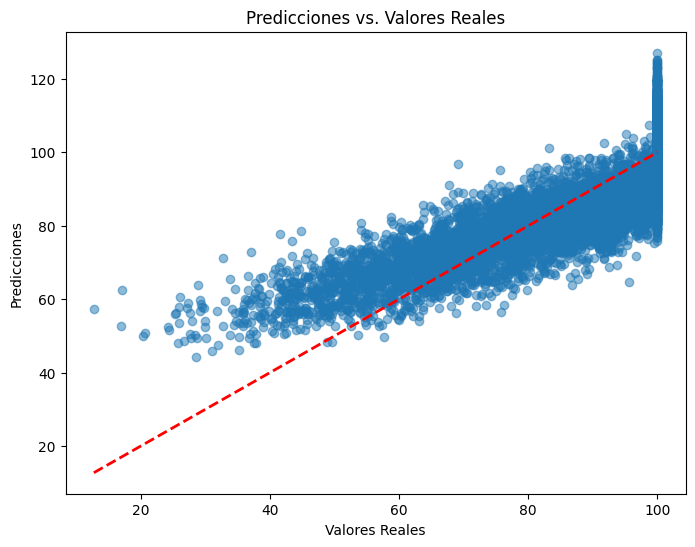

In [40]:
# Gráfico de predicciones vs. valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores Reales")
plt.show()

#### Interpretación del gráfico

De forma muy básica, este gráfico nos muestra la predicción del modelo frente a los valores reales.

Por ejemplo, para una muestra cuyo valor real es una satisfacción de 100, ¿Qué valor predice el modelo? Cada punto azul representa una de estas muestras. Por lo tanto, si las predicciones del modelo fueran perfectas, los puntos caerían justo sobre la línea roja. Cuanto más cerca están los puntos de esa línea, mejor es el rendimiento del modelo. En cambio, si vemos que hay una dispersión significativa, con muchos puntos alejados de la línea, indicaría que el modelo tiene dificultades para predecir correctamente en algunos casos.

Este gráfico sugiere que el modelo está logrando capturar las tendencias generales, pero está lejos de ser perfecto. Los errores en los extremos nos indican que el modelo podría necesitar mejoras o ajustes para capturar mejor los detalles en los valores de satisfacción más altos y los más bajos.


## 2.7. Importancia de las características

Ahora, para entender cómo nuestro modelo toma decisiones, vamos a explorar qué características tienen mayor influencia en la predicción de satisfacción del cliente.

### 2.7.1. Interpretación de los coeficientes

En los modelos de regresión lineal, cada característica tiene un coeficiente asociado que nos dice cómo afecta a la predicción. Un coeficiente positivo sugiere que, al aumentar el valor de esa característica, la satisfacción del cliente aumenta, y a la inversa. Esto es igual a lo que vimos en el ejemplo de la tienda de bicicletas en los apartados 1.8.3. y 1.10.1.

Para simplificar la interpretación, podemos visualizar la importancia relativa de cada característica en un gráfico de barras, donde cada barra representa la magnitud del impacto de una característica en la predicción de satisfacción del cliente.

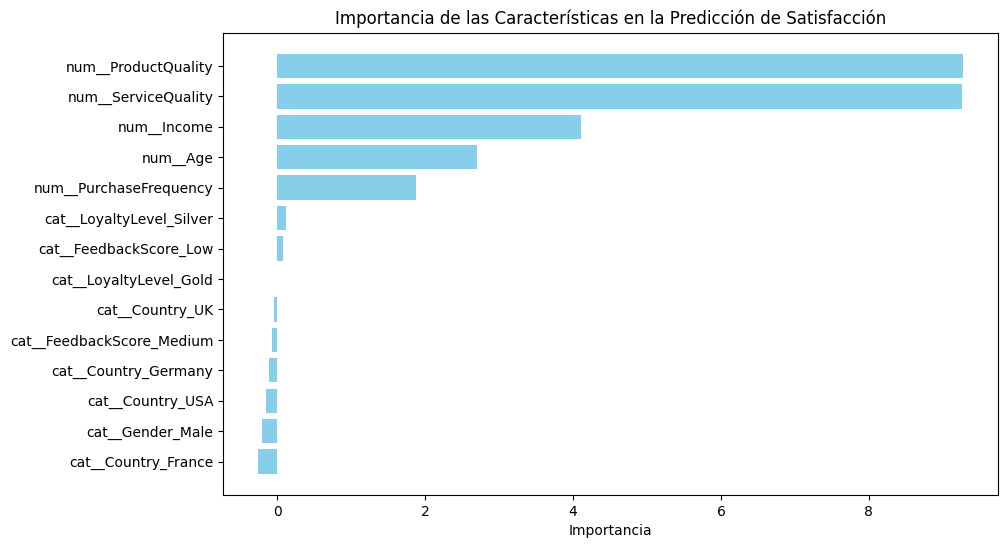

In [41]:
# Obtener los coeficientes del modelo entrenado
coef = model_pipeline.named_steps['regressor'].coef_

# Crear un DataFrame para mostrar las características y sus coeficientes
features = preprocessor.get_feature_names_out()
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': coef
}).sort_values(by='Importance', ascending=False)

# Visualizar los coeficientes en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Características en la Predicción de Satisfacción')
plt.gca().invert_yaxis()
plt.show()

Como podemos ver, claramente hay dos características que tienen un impacto significativo en la predicción de satisfacción del cliente: **Calidad del Producto** y **Calidad del Servicio**.

Esto realmente no es ninguna sorpresa, y está claro que si queremos aumentar la satisfacción del cliente, estas son dos áreas ganadoras a la hora de enfocar nuestros esfuerzos.

Sin embargo, tengamos en cuenta nuevamente que esto son las percepciones de nuestro modelo, por lo tanto, cuanto mejor sea el modelo, más fiable serán estas conclusiones, y ahora mismo no es demasiado fiable, seguro que hay muchos detalles que se nos escapan.

# Conclusión y reflexión sobre la linealidad

Para esta tarea hemos usado un modelo de regresión lineal, puedes pensar en él como una herramienta que nos ayuda a entender y predecir, en este caso, el grado de satisfacción de los clientes a partir de ciertos factores clave.

Al encontrar patrones en los datos, podemos ajustar estrategias para mejorar la experiencia del cliente y, en consecuencia, la satisfacción general. La idea sería encontrar aquellas relaciones que hagan que, cuando una característica cambie, la satisfacción del cliente cambie de manera predecible, pero esto no es tan simple. Aquí te muestro un ejemplo sintético que he creado para ilustrar esto:

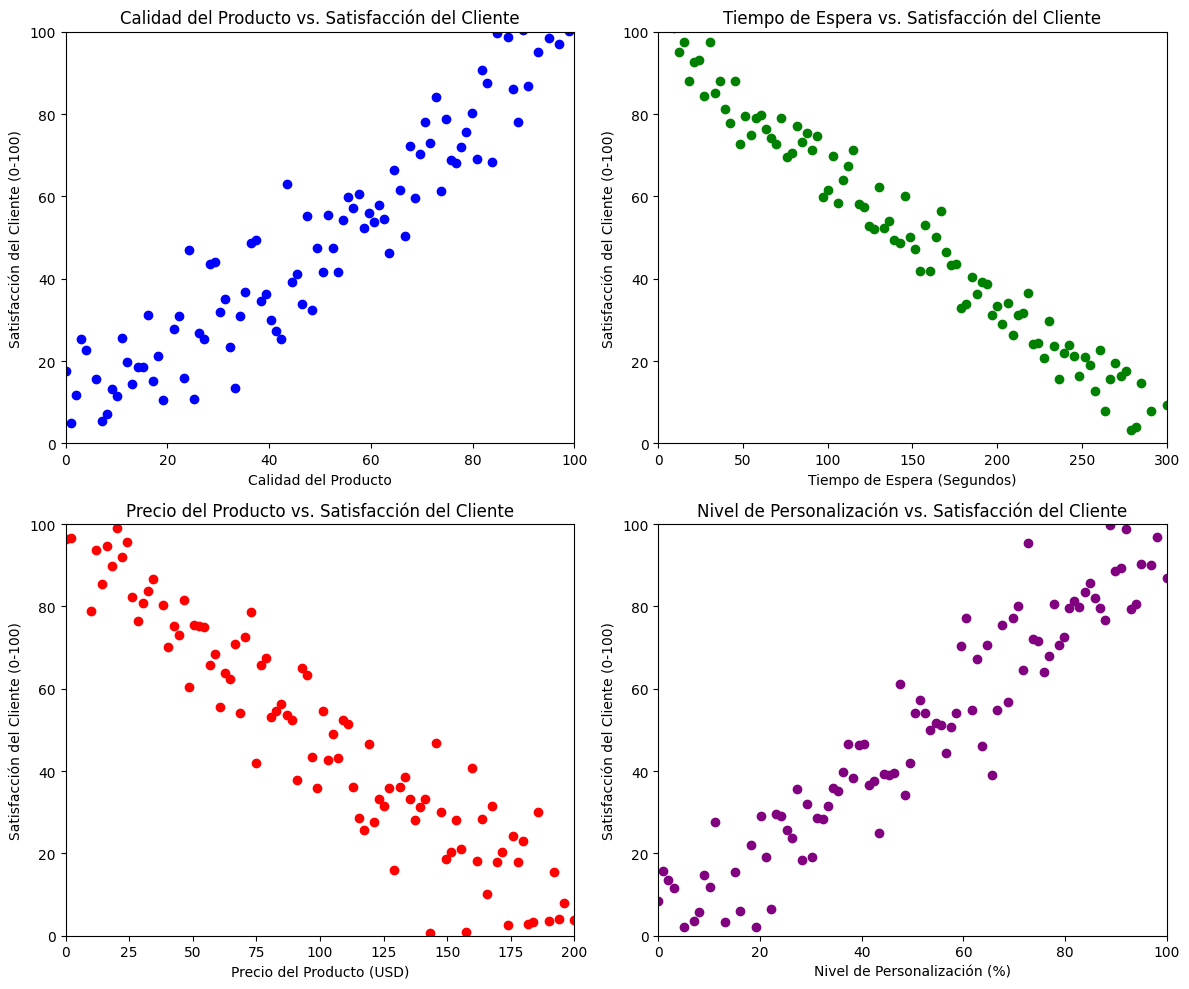

In [42]:
# Función extraída de `helper_functions.py`
plot_example_relationships()

En estas gráficas, podemos ver 4 posibles relaciones lineales entre características y satisfacción del cliente:

1. **Calidad del Producto vs. Satisfacción del Cliente**
   - Interpretación: A medida que la calidad del producto mejora, la satisfacción del cliente aumenta, mostrando una relación positiva clara.
2. **Tiempo de Espera vs. Satisfacción del Cliente**
   - Interpretación: Cuando el tiempo de espera en atención al cliente disminuye, la satisfacción del cliente sube, indicando una relación lineal inversa entre ambas variables.
3. **Precio del Producto vs. Satisfacción del Cliente**
   - Interpretación: A medida que el precio del producto se incrementa, la satisfacción del cliente tiende a disminuir, reflejando una relación lineal negativa.
4. **Nivel de Personalización vs. Satisfacción del Cliente**
   - Interpretación: A mayor nivel de personalización, la satisfacción del cliente también aumenta, mostrando otra relación lineal positiva.

#### Reflexión sobre la linealidad

Como probablemente hayas pensado mientras leías esto, es muy difícil encontrar relaciones lineales exactas. Es tentador pensar que todo en la vida sigue una línea recta, pero rara vez es así. La linealidad es una simplificación que a veces nos ayuda a entender ciertos patrones, pero no suelen representar toda la realidad. En la práctica, los clientes son influenciados por muchos factores a la vez, por lo que es raro encontrar relaciones completamente lineales.

Por ejemplo, la calidad del producto puede ser alta, pero ¿qué pasa si las expectativas del cliente son todavía más altas? O si, por alguna razón personal, ese cliente está teniendo un mal día y su percepción es negativa independientemente de la calidad real.

Además, algunas relaciones pueden parecer lineales solo hasta cierto punto. Imagina que te ofrecen tu comida favorita: a medida que te dan más, tu satisfacción aumenta, pero llega un momento en que ya estás lleno, y en lugar de felicidad, empieza a aparecer el malestar. En ese punto, la relación ya no es lineal, sino que puede incluso invertirse.

La linealidad es una herramienta útil para hacer aproximaciones y simplificar problemas, pero debemos recordar sus limitaciones. Podemos usarla como una primera aproximación, pero cuando necesitamos profundizar más, es ahí donde tenemos que tirar de relaciones no lineales, que son más complejas pero también más realistas. Este es un concepto fundamental en el mundo de la IA y Machine Learning, y exploraremos más sobre la "no-linealidad" en otros notebooks.

## Toma de Acción para consolidar el aprendizaje: El Aprendizaje Supervisado en la Vida Diaria

En este notebook, hemos abordado los conceptos básicos del aprendizaje supervisado y has aprendido cómo puedes aplicar modelos de clasificación y regresión para resolver problemas específicos. Pero el aprendizaje supervisado va más allá de los datos y algoritmos.

Si mantienes un enfoque práctico y creativo, puedes desarrollar una mentalidad analítica y comenzar a ver patrones en el mundo que te rodea. Algo fundamental para esta etapa maravillosa que nos ha tocado vivir en la que la IA cada vez forma más parte de nuestra vida.

Aquí tienes algunas acciones y reflexiones para aplicar este enfoque en tu vida cotidiana o tu negocio. No necesitass tener conocimientos técnicos, estas acciones tienen un gran poder, y te ayudarán no sólo a consolidar el aprendizaje de este notebook, sino a desarrollar una mentalidad fundamental para entender a la IA verdaderamente:

1. **Identificación de datos etiquetados en tu entorno**: Observa a tu alrededor en tu negocio, en casa o en la vida cotidiana. ¿Puedes encontrar datos etiquetados? Por ejemplo, en una tienda, podrías tener datos etiquetados de productos y ventas, o en casa podrías tener listas de tareas y categorías de actividades.

2. **Definición de problemas basados en datos**: ¿Hay algún problema que podrías resolver con esos datos? Piensa en preguntas como: "¿Qué tareas hago más rápido por la mañana?", "¿Qué productos tienen más éxito en determinadas temporadas?" Intenta definir un problema que se pueda resolver con aprendizaje supervisado.

3. **Exploración de características (features)**: Define qué características son importantes para resolver ese problema. ¿Qué variables serían relevantes? Por ejemplo, en un contexto de tareas domésticas, podrías usar el tiempo que te toma cada actividad, la energía que necesitas, etc.

4. **Pensar en la Etiqueta**: Reflexiona sobre lo que quieres predecir o clasificar en el problema que planteaste. En términos de aprendizaje supervisado, ¿cuál sería la "etiqueta" de tu conjunto de datos? Podría ser "nivel de satisfacción después de realizar cada tarea" o "probabilidad de éxito de una venta en tu negocio".

5. **Visualización de patrones en datos diarios**: Observa si encuentras patrones en los datos de tu vida diaria. Quizás notas que ciertos días (o a ciertas horas) eres más productivo. Intenta identificar factores (features) que podrían estar relacionados con esos patrones.

6. **Construcción de relaciones lógicas**: Piensa en cómo podrías construir relaciones entre variables en el problema que identificaste. ¿Qué variables podrías utilizar para "predecir" tu productividad o algún otro indicador de interés?

7. **Evaluación de cambios en las relaciones**: Reflexiona sobre cómo las relaciones pueden cambiar. Por ejemplo, si observas una relación entre tu estado de ánimo y la hora del día, ¿en qué condiciones esa relación no se cumple? Esto te ayuda a comprender el concepto de "ruido" o variabilidad en los datos.

8. **Perspectiva crítica. Factores relevantes e irrelevantes**: ¿Cuáles son las variables realmente relevantes y cuáles no aportan información? ¿Cuáles son los datos verdaderamente útiles para tu problema y aquellos que sólo aportan complejidad?

9.  **Reflexión sobre datos desbalanceados en la vida**: Piensa en áreas donde tengas más o menos datos, por ejemplo, "actividades que realizas con mucha frecuencia" vs "actividades poco comunes". Reflexionar sobre esto te puede dar una idea de los datos desbalanceados y cómo afectan en tus decisiones.

10. **Identificación de relaciones lineales y no lineales en tu vida**: Busca relaciones lineales o patrones simples en tu entorno (por ejemplo, "cuanto más ejercicio hago, mejor me siento"). Luego, reflexiona sobre en qué punto esa relación podría romperse (por ejemplo, cuando te excedes en el ejercicio y te cansas demasiado). Este ejercicio te puede ayudar a entender la idea de "no linealidad" y los límites de los modelos lineales.

# Referencias y recursos

**Recursos internos**

- [Manual de uso de estos notebooks](https://github.com/ManuelEspejo/Machine-Learning-Bases/blob/main/docs/manual-notebooks.md) 
- [Notebook 00](https://github.com/ManuelEspejo/Machine-Learning-Bases/blob/main/notebooks/00_Empieza-aquí.ipynb)

**Datasets**

- [Bike Buyers en Kaggle](https://www.kaggle.com/datasets/heeraldedhia/bike-buyers).
- [Customer Feedback and Satisfaction en Kaggle](https://www.kaggle.com/datasets/jahnavipaliwal/customer-feedback-and-satisfaction)